Class labels: [0 1 2]


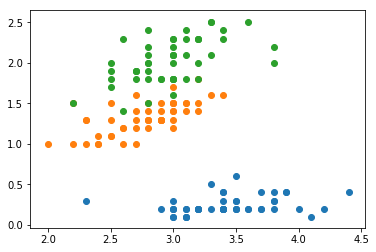

In [130]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#Loading iris data set from scikit-learn  
iris = datasets.load_iris()

X = iris.data[:, [1, 3]] # The Features
y = iris.target # The Label 

print('Class labels:', np.unique(y)) #we use unique() to find the unique elements of an array.
plt.scatter(X[:50,0],X[:50,1])
plt.scatter(X[50:100,0],X[50:100,1])
plt.scatter(X[100:150,0],X[100:150,1])


plt.show() 

In [131]:
from sklearn.model_selection import train_test_split

# Splitting data into 70% training and 30% test data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [132]:
print('Labels counts in y:', np.bincount(y)) 
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [133]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [134]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

         # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

         # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=cl, 
                        edgecolor='black')

        # highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]

            plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

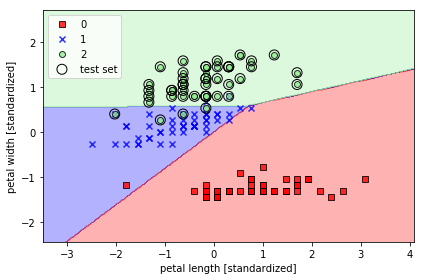

Accuracy P: 0.91


In [135]:
def perceptron_test():
    

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    #plot_decision_regions(X=X_combined_std, y=y_combined,
    #                     classifier=ppn, test_idx=range(105, 150))
    plot_decision_regions(X=X_std, y=y,
                      classifier=ppn, test_idx=range(105, 150))

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/03_01.png', dpi=300)
    plt.show()
    #print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))
    print('Accuracy P: %.2f' % ppn.score(X_std[105:150], y[105:150]))
    Perceptron_accuracy= ppn.score(X_std[105:150], y[105:150])
    
perceptron_test()    


In [136]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  

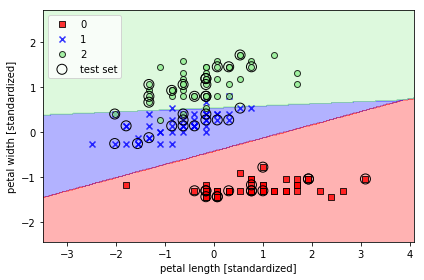

Accuracy LR: 1.0


In [137]:
def logistic_regression_test():
    
    lr1 = LogisticRegression(C=1000.0, random_state=1)
    lr1.fit(X_train_std, y_train)


    #fig , ax = plt.subplots(1,2)
    plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr1, test_idx=range(105, 150))

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    #plt.savefig('images/03_06.png', dpi=300)
    plt.show()
    #print('Accuracy: %.2f' % lr1.score(X_test_std, y_test))
    print('Accuracy LR:',lr1.score(X_combined_std[105:150],y_combined[105:150]))
    LR_accuracy=lr1.score(X_combined_std[105:150],y_combined[105:150])
    
logistic_regression_test()

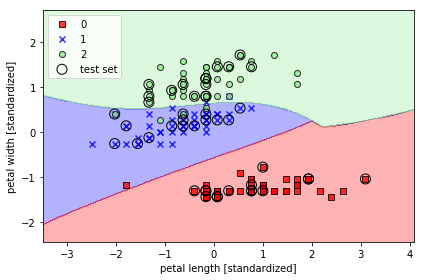

acc score: 1.0


In [127]:
def SVC_test():
    
    
    svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
    svm.fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    #plt.savefig('images/03_15.png', dpi=300)
    plt.show()
    y_pred = svm.predict(X_test_std)
    #print('Accuracy: %.2f' % svm.score(X_test_std, y_test))
    print('acc score:',svm.score(X_combined_std[105:150],y_combined[105:150]))
    SVC_accuracy=svm.score(X_combined_std[105:150],y_combined[105:150])
    
SVC_test()

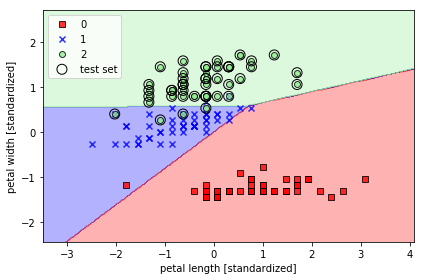

Accuracy P: 0.91


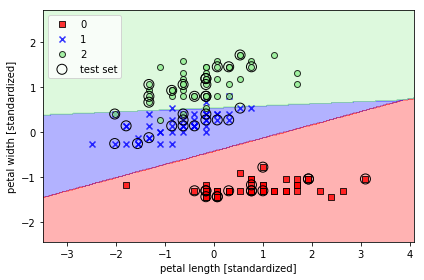

Accuracy LR: 1.0


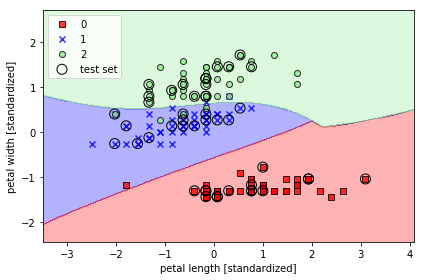

acc score: 1.0


In [128]:
def choice_model():
    perceptron_test() 
    logistic_regression_test()
    SVC_test()
    
choic_model()
